In [3]:
!pip3 install pandas

     ---------------------------------------- 0.0/341.8 kB ? eta -:--:--
     ----------------------------- -------- 266.2/341.8 kB 8.3 MB/s eta 0:00:01
     -------------------------------------- 341.8/341.8 kB 5.3 MB/s eta 0:00:00
   ---------------------------------------- 0.0/10.6 MB ? eta -:--:--
   - -------------------------------------- 0.4/10.6 MB 7.8 MB/s eta 0:00:02
   -- ------------------------------------- 0.8/10.6 MB 8.0 MB/s eta 0:00:02
   ---- ----------------------------------- 1.1/10.6 MB 7.7 MB/s eta 0:00:02
   ----- ---------------------------------- 1.5/10.6 MB 8.1 MB/s eta 0:00:02
   ------ --------------------------------- 1.7/10.6 MB 7.3 MB/s eta 0:00:02
   ------- -------------------------------- 2.1/10.6 MB 7.4 MB/s eta 0:00:02
   --------- ------------------------------ 2.5/10.6 MB 7.5 MB/s eta 0:00:02
   ---------- ----------------------------- 2.9/10.6 MB 7.6 MB/s eta 0:00:02
   ------------ --------------------------- 3.3/10.6 MB 7.7 MB/s eta 0:00:01
   -

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ultralytics 8.0.215 requires py-cpuinfo, which is not installed.
ultralytics 8.0.215 requires seaborn>=0.11.0, which is not installed.
ultralytics 8.0.215 requires tqdm>=4.64.0, which is not installed.


In [8]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten,Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.vgg19 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
import numpy as np
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt

In [9]:
train_path='Senior Design/train'
test_path='Senior Design/test'
val_path='Senior Design/val'
x_train=[]

for folder in os.listdir(train_path):

    sub_path=train_path+"/"+folder

    for img in os.listdir(sub_path):

        image_path=sub_path+"/"+img

        img_arr=cv2.imread(image_path)

        img_arr=cv2.resize(img_arr,(224,224))

        x_train.append(img_arr)

x_test=[]

for folder in os.listdir(test_path):

    sub_path=test_path+"/"+folder

    for img in os.listdir(sub_path):

        image_path=sub_path+"/"+img

        img_arr=cv2.imread(image_path)

        img_arr=cv2.resize(img_arr,(224,224))

        x_test.append(img_arr)

x_val=[]

for folder in os.listdir(val_path):

    sub_path=val_path+"/"+folder

    for img in os.listdir(sub_path):

        image_path=sub_path+"/"+img

        img_arr=cv2.imread(image_path)

        img_arr=cv2.resize(img_arr,(224,224))

        x_val.append(img_arr)

In [10]:
train_x=np.array(x_train)
test_x=np.array(x_test)
val_x=np.array(x_val)
train_x=train_x/255.0
test_x=test_x/255.0
val_x=val_x/255.0

In [11]:
train_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)
val_datagen = ImageDataGenerator(rescale = 1./255)

In [12]:
training_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'sparse')
test_set = test_datagen.flow_from_directory(test_path,
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'sparse')
val_set = val_datagen.flow_from_directory(val_path,
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'sparse')

Found 10752 images belonging to 7 classes.
Found 3360 images belonging to 7 classes.
Found 2688 images belonging to 7 classes.


In [13]:
train_y=training_set.classes
test_y=test_set.classes
val_y=val_set.classes

In [14]:
training_set.class_indices
train_y.shape,test_y.shape,val_y.shape

((10752,), (3360,), (2688,))

In [15]:
IMAGE_SIZE = (224, 224)

In [16]:
input_shape = IMAGE_SIZE + (3,)

In [17]:
vgg = VGG19(input_shape=input_shape, weights='imagenet', include_top=False)

80134624/80134624 [==============================] - 89s 1us/step


In [18]:
x = Flatten()(vgg.output)

In [19]:
#adding output layer.Softmax classifier is used as it is multi-class classification
prediction = Dense(8, activation='softmax')(x)

model = Model(inputs=vgg.input, outputs=prediction)

In [20]:
# view the structure of the model
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [21]:
model.compile(
  loss='sparse_categorical_crossentropy',
  optimizer="adam",
  metrics=['accuracy']
)

In [22]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop=EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=5)
#Early stopping to avoid overfitting of model

In [ ]:
# fit the model
history = model.fit(
  train_x,
  train_y,
  validation_data=(val_x,val_y),
  epochs=5,
  callbacks=[early_stop],
  batch_size=32,shuffle=True)

Epoch 1/5
 27/336 [=>............................] - ETA: 3:12:25 - loss: 2.3906 - accuracy: 0.1412

In [ ]:
# accuracies

plt.plot(history.history['accuracy'], label='train acc')

plt.plot(history.history['val_accuracy'], label='val acc')

plt.legend()

plt.savefig('vgg-acc-rps-1.png')
                                  
plt.show()

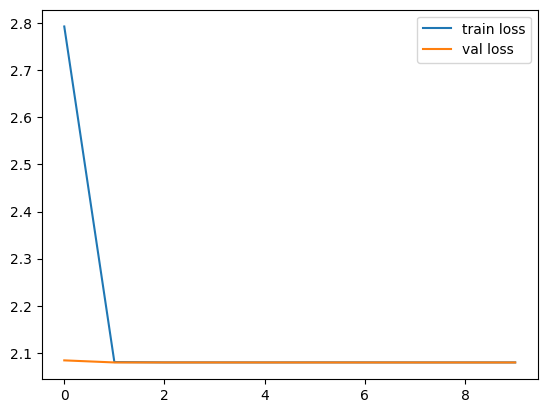

In [18]:
# loss
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.savefig('vgg-loss-rps-1.png')
plt.show()

In [19]:
model.evaluate(test_x,test_y,batch_size=32)

12/12 [==============================] - 111s 9s/step - loss: 2.0794 - accuracy: 0.1277


[2.0793678760528564, 0.12765957415103912]

In [20]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
import numpy as np

In [21]:
#predict
y_pred=model.predict(test_x)
y_pred=np.argmax(y_pred,axis=1)
#get classification report
print(classification_report(y_pred, test_y, zero_division = 0))
#get confusion matrix
print(confusion_matrix(y_pred,test_y))

12/12 [==============================] - 112s 9s/step
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0
           4       1.00      0.13      0.23       376
           5       0.00      0.00      0.00         0
           6       0.00      0.00      0.00         0
           7       0.00      0.00      0.00         0

    accuracy                           0.13       376
   macro avg       0.12      0.02      0.03       376
weighted avg       1.00      0.13      0.23       376

[[ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]
 [46 46 47 48 48 47 47 47]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]]
